# Importar librerías iniciales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

### Cargamos el archivo

In [2]:
df = pd.read_csv("project_2_dataset.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(141194, 23)

# Análisis de NA's
Antes de iniciar cualquier otro análisis, tenemos que observar si existen NA's, como también cuántos hay y cuánto % representa de la columna. Esto definirá de qué métodos utilizaremos para reemplazarlos, o en casos extremos también descartar la columna completa.

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1437
MaxTemp           1218
Rainfall          3162
Evaporation      61014
Sunshine         67848
WindGustDir      10009
WindGustSpeed     9946
WindDir9am       10265
WindDir3pm        4109
WindSpeed9am      1710
WindSpeed3pm      2973
Humidity9am       2578
Humidity3pm       4400
Pressure9am      14625
Pressure3pm      14594
Cloud9am         54283
Cloud3pm         57691
Temp9am           1712
Temp3pm           3520
RainToday         3162
RainTomorrow      3160
dtype: int64

## NA's en variable objetivo
Ya que nuestro dataset cuenta con 141,194 registros, podemos hacer un listwise deletion de la columna de la variable objetivo *Y: RainTomorrow*. Esto se debe a que la columna tiene 3,160 datos faltantes, a comparación de la cantidad de datos que tiene el dataframe, hacer un listwise deletion va tener efectos insignificantes. Es importante eliminar estos NA's, ya que la columna de la variable objetivo *Y: RainTomorrow* tiene que estar completa para poder crear un modelo.
- Listwise Deletion: Se refiere al método donde al tener la presencia de un NA en la columna(s) especificada(s), se borra la fila respectiva.

In [5]:
df.dropna(subset=['RainTomorrow'],inplace=True)

In [6]:
y = df['RainTomorrow'].copy()
X = df.iloc[:,:-1]

In [7]:
y = y.map(dict(Yes=1, No=0))

In [8]:
y.value_counts()

0    107093
1     30941
Name: RainTomorrow, dtype: int64

In [9]:
107093/df.shape[0]

0.7758450816465509

Vemos que la variable objetivo Y se conforma de 77% resultados de "No" y el resto y 23% "Sí". Hay que tomarlo en cuenta al momento de entrenar nuestro modelo, pues hay riesgo que esté aprendiendo de memoria el patrón del training data. 

## Partición en Training y Testing
Partimos el dataset en 70% training y 30% testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=20)

## Distribución de los datos
Los datos que estén distribuidos de forma normal (campana gaussiana) podemos utilizar una imputación con el promedio de los datos. Si la columna tiene outliers muy pronunciados, la manera apropiada para reemplazar los datos faltantes sería por medio de la mediana. (De utilizarse promedio, corremos el riesgo de sesgar la data por la presencia de 1 o más outliers). 

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

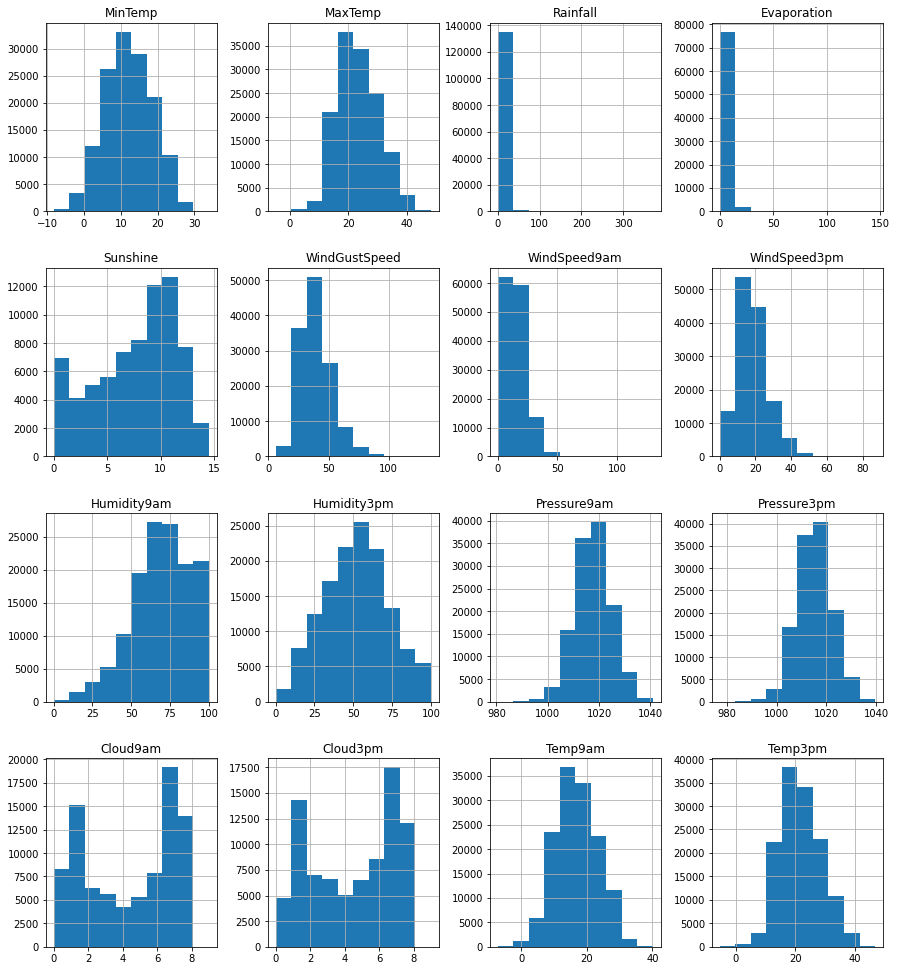

In [11]:
df.hist(figsize=(15,17))

### Columnas con forma más o menos gaussiana
- *MinTemp, MaxTemp, Humidity3pm, Temp9am, Temp3pm*  
Las columnas las podemos reemplazar ya sea con la media o el promedio. Normalmente las dos no varían mucho si la distribución es normal.

### Columnas con sesgo
- *Rainfall, Evaporation, Sunshine, WindgustSpeed, Windspeed9am, Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm*  
En este caso, es mejor reemplazar los datos con la media. Por ejemplo, podemos tener que el 99% de los datos tengan una velocidad de 5 km/h en la velocidad del viento y 1% tiene 80 km/h. Por lo tanto, se utiliza la media para reemplazar ya que organiza estos de forma ascendente y es una mejor representación total de los datos. 

### Columnas con distribución bimodal
- *Cloud9am, Cloud3pm*  
La distribución bimodal describe la existencia de dos grupos en la data. Las columnas de *Cloud* describen la fracción del cielo oscurecida por las nubes y es medida en *oktas*. Ambas se puede observar que los datos se encuentran entre 0-2 oktas o en 6-8 oktas. 

# Otra visualizaciones para el missing data

<AxesSubplot:>

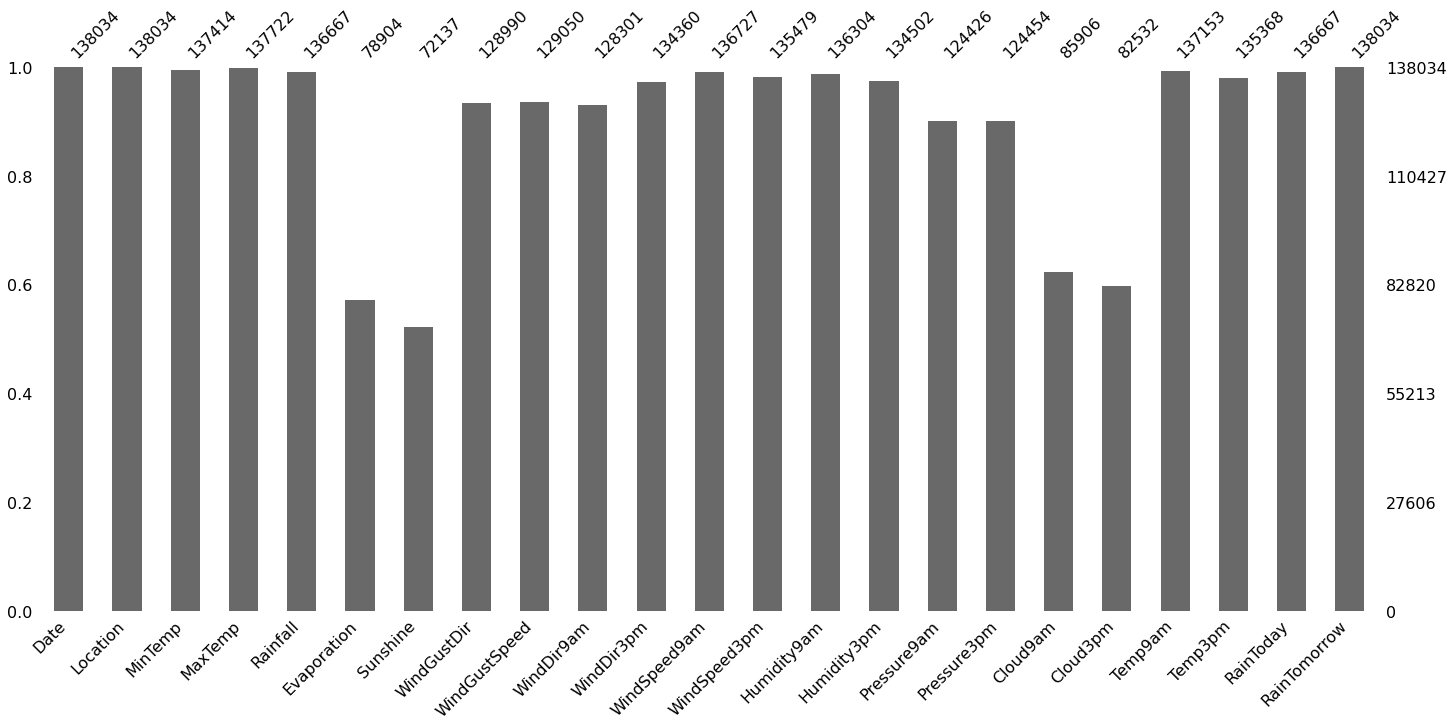

In [12]:
# pip install missingno
import missingno as msno
msno.bar(df)

## Descartar columnas con 50% o más de NA's.

In [13]:
discard_columns = df.columns[df.isnull().mean() > 0.5]
discard_columns

Index([], dtype='object')

Las siguientes dos gráficas simplemente son para visualizar dónde se encuentran los NA's en el dataset. Es fácil ver que los datos faltantes en ciertas columnas tienen relación directamente con otras. Existen modelos complejos donde pueden reemplazar NA's utilizando este tipo de relaciones, sin embargo es necesario que el resto de columnas estén completas. En nuestro caso, la mayoría de columnas tienen NA's. 

<AxesSubplot:>

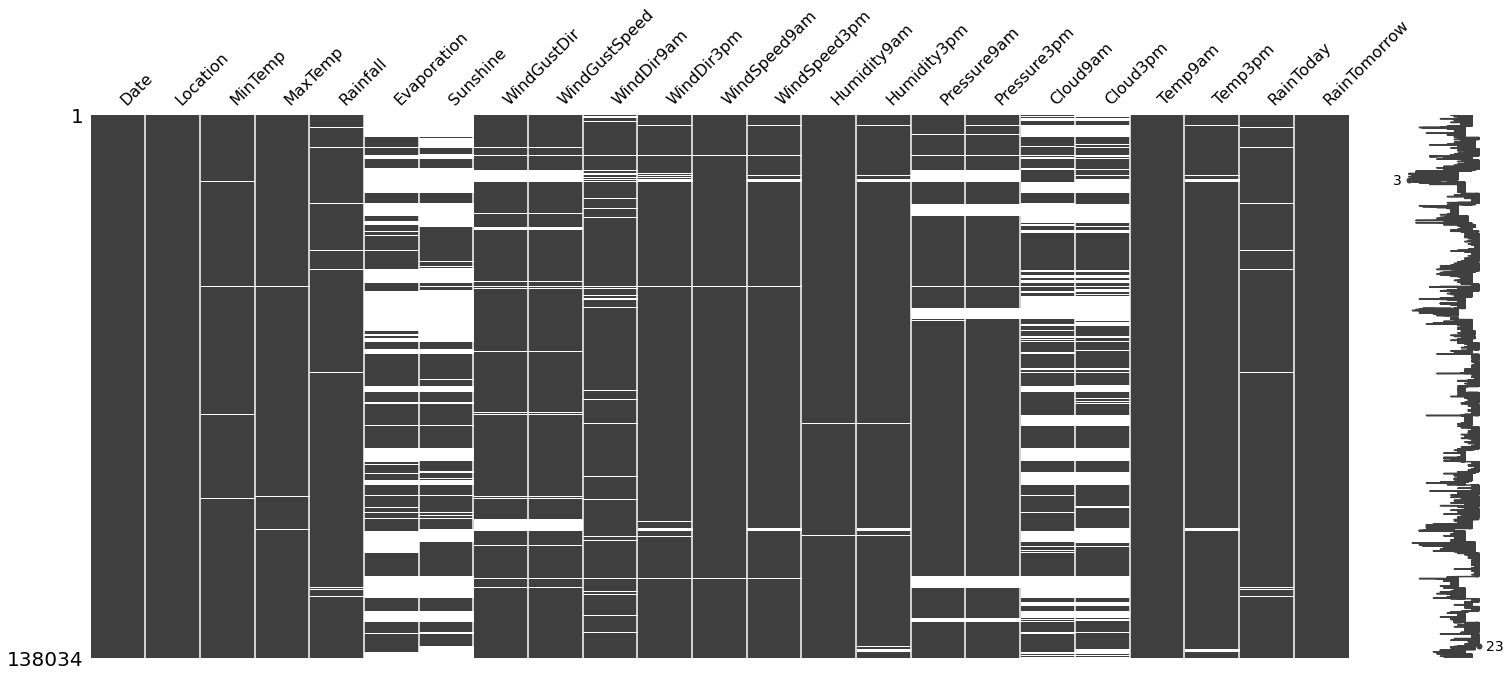

In [14]:
msno.matrix(df)

### La gráfica nos proporciona otra vista de los datos faltantes de una columna se conectan directamente con los faltantes de otra.

<AxesSubplot:>

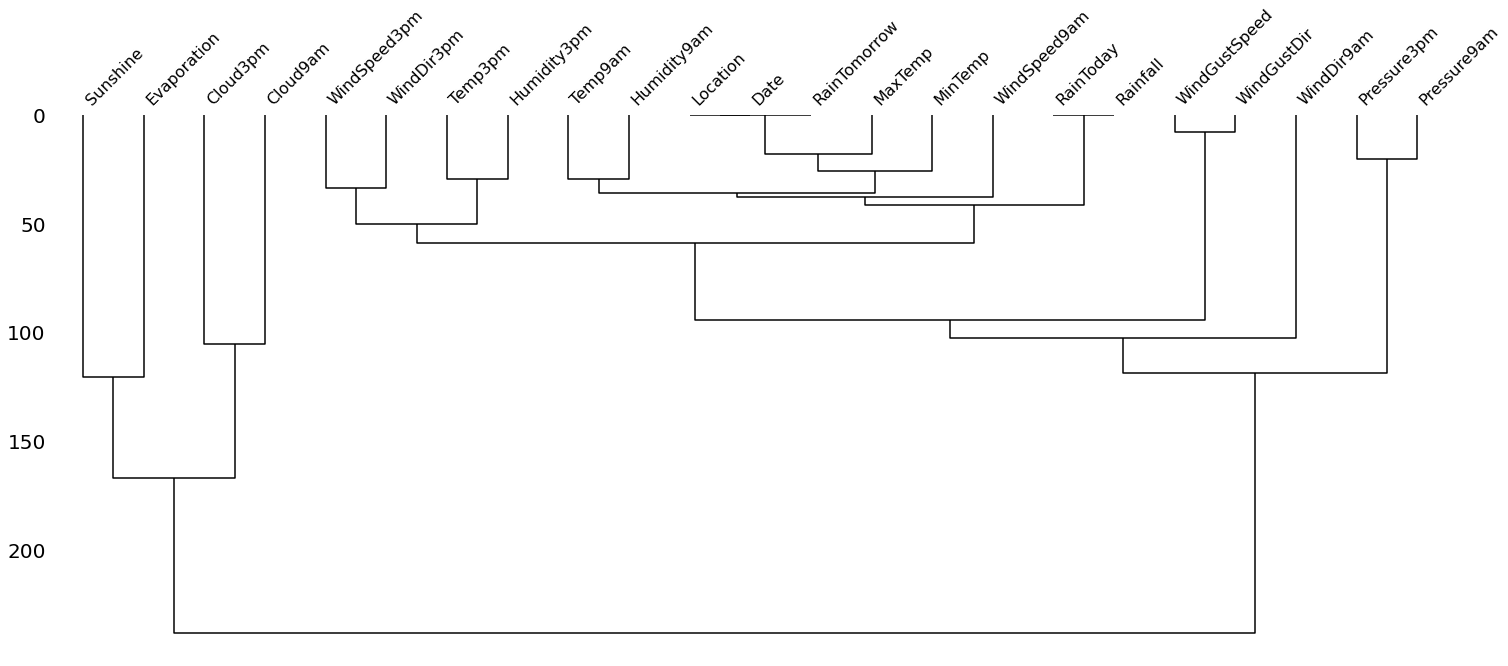

In [15]:
msno.dendrogram(df)

# Data Types
Analizamos con el tipo de columnas que estamos trabajando, y posteriormente vamos a trabajar con diferentes tipos de imputaciones y transformaciones para cada una

In [16]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Nombre columnas

In [17]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(exclude='number').columns
rem_col = ['RainTomorrow', 'Date'] #No queremos tomar en cuenta la fecha en las categóricas, como tampoco la variable objetivo.
cat_col = cat_col.drop(rem_col)

# Pipelines  
### Columnas Categóricas  
Creamos un pipeline para las variables categóricas, donde imputamos los datos faltantes con el método de *most_frequent*. Adicionalmente utilizamos el método de *OneHotEncoder* para primero, convertir las variables categóricas de formato string/object a números que representen la categoría. Después, el *OneHotEncoder* hace dummify las variables. Lo que hace el dummification es que crea una nueva columna por cada categoría, donde después en el modelo lo identifica simplemente como una combinación de unos y ceros.  
### Columnas Númericas  
Dado a que existen más columnas con distribución sesgada, como también de distribución bimodal, aplicaremos a todas la imputación de *median*. Es la que se ajusta mejor a todos los tipos de distribuciones. También aplicaremos un standard scaler para poder normalizar lo más posible la data y ayudar que el modelo sea más efectivo. No aplicamos el standard scaler a las variables categóricas ya que estas simplemente son representaciones de unos y ceros.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('oh_enc', OneHotEncoder())
    ])

median_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])


### Full Pipeline
Combinamos ambos el pipeline categórico y el pipeline númerico

In [19]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_col),
        ("num_median", median_pipeline, num_col)
    ])

### Validar si funciona

In [20]:
#X_train_processed = full_pipeline.transform(df)
X_train_processed = full_pipeline.fit_transform(X_train)
print(X_train_processed.shape)
X_train_processed.toarray()

(96623, 115)


array([[ 0.        ,  0.        ,  0.        , ..., -1.75488019,
         1.73358969,  1.38788318],
       [ 0.        ,  0.        ,  0.        , ..., -0.80824225,
         1.1611149 ,  0.87741072],
       [ 0.        ,  0.        ,  0.        , ...,  0.1383957 ,
         0.75883533,  0.3377684 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.1383957 ,
        -0.21591904,  0.45444782],
       [ 0.        ,  0.        ,  0.        , ..., -0.33492327,
         1.05280886,  1.5629023 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.1383957 ,
        -0.66461549, -0.93112028]])

Podemos proceder a elaborar el análisis del método de predicción más óptimo, para al final poder combinar el pipeline de pre-processing con el pipeline de predicción.

# Modelos de Predicción
Estaremos trabajando con 3 modelos principales los cuales son: **LogisticRegressionClassifier**, **LinearSVC** y **DecisionTreesClassifier**. Cada modelo tiene sus propios hyperparameters y para evitar el tuning manual, estaremos utilizando la  *GridSearchCV* para dejar que la computadora determine cuales parámetros y qué combinación de estos es la más apropiada. Al finalizar, vamos a escoger el modelo que tenga mejor desemplo en el testing set, utilizando el score *F1* como punto de referencia.

## LogisticRegression
El modelo estima la probabilidad que la variable objetivo pertenezca a cierta clase. Como es un clasificador binario, estos rangos son de 0 a 1 (0% a 100%). También se puede denotar que se comporta como una función *sigmoide*. Normalmente el threshold con el que se trabaja si se quiere convertir las probabilidades en clases, es que si p >= 50% se clasifica como 1, de lo contrario es 0. El clasificador es apropiado para manejar problemas de clasificación binaria. Sin embargo, se debe de evitar la correlación entre variables independientes. Como también descartar las que no sean significantes o evitar un alto número de variables categóricas.

## Parámetros de Regularización
### Penalty
La regresión penalizada se utiliza para penalizar el uso de muchas variables en el modelo. Para lograr esto, se agrega una restricción que es la **regularización.** Aquí es donde se introduce el valor *lambda*, que determina el valor de *shrinkage*. *Lambda* también se utiliza para ajustar los modelos que tengan problemas ya sea con bias o variación en el training set como también en el cross-validation. El fin de ajustar *lambda* es para poder asegurar que nuestro modelo sea lo más generalizable posible. Si queremos reducir la variación, aumentamos *lambda*. Si queremos reducir el bias, reducimos *lambda*. *Lasso Regression* se distingue ya que normalmente descarta totalmente uno o más set de features que sean irrelevantes para el análisis. Mientras que *Ridge Regression* simplemente les reduce su peso al análisis final.
- L1 Lasso Regression: Agarra el valor de la suma de los errores al cuadrado, y lo suma por el valor de lambda multiplcado por el **valor al cuadrado de la pendiente**
- L2 Ridge Regression: Agarra el valor de la suma de los errores al cuadrado, y lo suma por el valor de lambda multiplicado por el **valor absoluto de la pendiente.**  

### Valor C
Es la inversa de lo que es el valor de *lambda*. **C = 1/lambda** Esto significa que mientras más grande sea C, va a ser menos fuerte la regularización. Mientras más pequeño, va a resultar más rígido. Sí el valor de C es 1, significa que casi no tiene penalización presente. Sí el valor C se acerca a 0, tiene penalización más rígida.

### Solvers
 - newtong-cg: No es apto de utilizar si existen muchas dimensiones
 - lbfgs: Limited Memory Broyden–Fletcher–Goldfarb–Shanno, es el algoritmo usado de predeterminado.
 - sag: Abreviado de Stochastic Average Gradient Descent, bueno para datasets grandes
 - saga: Variante de SAG, y puede utilizar penalización L1, bueno para datasets grandes
 - liblinear: apropiado para datasets con menores observaciones

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression

param_grid = [ {'penalty': ['l1'],
                'solver': ['liblinear','saga'],
                'C': [0.001, 0.01, 0.1, 1]},
              {'penalty': ['l2'],
                'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
                'C': [0.001, 0.01, 0.1, 1]}
             ]
log_cl = LogisticRegression(random_state=42)

f1 = make_scorer(f1_score , average='macro')
# CV son la cantidad de folds que se harán
grid_search = GridSearchCV(log_cl, param_grid, cv=10,
                           scoring=f1,
                           return_train_score=True,
                           verbose=1,n_jobs=-1)
grid_search.fit(X_train_processed, y_train)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                     'liblinear']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=1)

# Logistic Regression Training Scores

In [22]:
logistic_model = grid_search.best_estimator_
logistic_model

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [23]:
grid_search.best_score_

0.7538042457747622

El modelo de Logistic Regression nos da un F1 score de 75% sobre el training set. Recordemos que el F1 score es un weighted score entre el score que obtiene de *Recall* y el de *Precision*.

# Support Vector Machine Classifier
## Linear SVC
El propósito de los márgenes es establecer una barrera/límite entre clases. Se destaca el modelo ya que utiliza clasificación con Soft Margin o Hard Margin. Puede elaborar clasificaciones lineales y no lineales. No proporciona probabilidades como el modelo de logistic regression.
- Soft Margin Classification: Más flexible y generalizable, pero puede ocasionar underfitting/bias.
- Hard Margin Classification: Sensible a la presencia de outliers, puede ocasionar overfitting/variation.  

## Parámetros
### Valor C
Un valor bajo no penaliza de manera significativa la mala clasificación de la variable objetivo, a diferencia de un valor alto que ocasiona un margen más pequeño entre las dos clases que se están prediciendo
### Loss
- Hinge: Para generar el valor de *loss*, se resta el valor predecido con el valor real de *y*.
- Squared_hinge: Lo anteriormente definido pero simplemente se eleva al cuadrado. Esto significa que los errores que sean de mayor magnitud son penalizados más fuerte.

In [24]:
from sklearn.svm import LinearSVC
param_grid = [ {'loss': ['hinge', 'squared_hinge'],
               'C': [0.001, 0.01, 0.1, 1]}
             ]

# create instance
svc_clf = LinearSVC(max_iter=2000, random_state=42)

f1 = make_scorer(f1_score , average='macro')

# search for best solution from combinations using a defined score function
grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                           scoring=f1,
                           return_train_score=True,
                           verbose=1,n_jobs=-1)

grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=2000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1],
                          'loss': ['hinge', 'squared_hinge']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=1)

# Linear SVC Scores

In [25]:
svc_model = grid_search.best_estimator_
svc_model

LinearSVC(C=0.01, max_iter=2000, random_state=42)

Dado a que no nos devuelve que parámetro de loss utiliza, podemos asumir que es *squared_hinge* ya que es el default del clasificador. Vemos que el parámetro óptimo para nuestro valor C (regularizador) es 0.01, lo cual significa que no penaliza mucho los errores de clasificación

In [26]:
grid_search.best_score_

0.7481341623341984

El Linear SVC tiene un F1 Score de 74%.

# Decision Tree Classifier

Como lo dice el nombre, trabaja bajo la metodología de un árbol. Tiene tres componentes principales las cuales son el root node (con el que comienza), los demás nodos que expanden el árbol, y finalmente los leaf nodes. El modelo funciona como un diagrama de flujo hasta llegar a un leaf node que determina que clase predice el modelo. El árbol termina de expanderse cuando el coeficiente *Gini* no tiene manera de reducirse. Los árboles de decisión son considerados supervised models, capaz de manejar datos númericos como también categóricos y no asumen ningún tipo de distribución de los datos. El modelo tiene como debilidad que fácilmente hace overfit. 

## Gini
El árbol de decisión trabaja por medio del coeficiente gini. Este simplemente denota la probabilidad de que una observación se clasifique mal si se selecciona de manera aleatoria. También se le conoce como la métrica de impurity.

## Parámetros
- Splitter: Es el método que utilizará para partir los nodos, donde best escoge el mejor por medio del valor de gini y en random de manera aleatoria. Anterior al correr al modelo creo que es mejor utilizar el método best pero igual manera podemos probar a ver que sucede.
- Max_depth: Que tan profundo puede llegar a ser el árbol en cuanto a niveles. En este caso lo dejamos establecido en entre 5, 10 y 15. Evitamos usar números más altos porque estaríamos arriesgándonos de cometer overfitting.
- Min_samples_leaf: Establecer la mínima cantidad de observaciones que tienen que haber para que se considere un leaf el grupo.

In [27]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [ {
                'splitter': ['best','random'],
                'max_depth': [5,10,15], 'min_samples_leaf': [3, 10, 12, 20]},
             ]

# create instance
tree_cl = DecisionTreeClassifier(random_state=42)

# define scoring function
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

# search for best solution from combinations using a defined score function
grid_search = GridSearchCV(tree_cl, param_grid, cv=10,
                           scoring=f1,
                           return_train_score=True,
                           verbose=1,n_jobs=-1)

grid_search.fit(X_train_processed, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_leaf': [3, 10, 12, 20],
                          'splitter': ['best', 'random']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [28]:
tree_model = grid_search.best_estimator_
tree_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42)

Los mejores parámetros detallan que el árbol debe tener una profundidad de 10 unidades, y por lo menos 20 samples para crear una hoja/leaf. El splitter que decidió como mejor estimador es del de *best*, ya que es el default del modelo y por lo mismo no lo saca en los resultados.

In [29]:
grid_search.best_score_

0.7377876096819658

El modelo de Decision Tree Classifier tiene un F1 Score de 73%.

# Logistic and Preprocessing Pipeline

In [45]:
classification_pipeline = Pipeline([ ("data_preprocessing", full_pipeline),
                                          ("log_cl", logistic_model)])

In [44]:
classification_pipeline.fit(X_train, y_train)
y_pred = classification_pipeline.predict(X_test)

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     32008
           1       0.73      0.51      0.60      9403

    accuracy                           0.85     41411
   macro avg       0.80      0.73      0.75     41411
weighted avg       0.84      0.85      0.83     41411



Como establecimos al inicio, mencionamos el riesgo que el modelo iba a estar sesgado por la distribución de la variable objetivo. En el diagrama, el modelo de logistic tiene punteo alto en F1 Score 90% cuando no llueve a comparación de cuando sí llueve de tan solo 60%. Viendolo de otra manera, vemos que tiene mayor fuerza en recall en 0 (es decir que tiene menos errores falsos negativos) y mejor precision en 1 (menor errores con falsos positivos)

# F1 Score Logistic Regression Testing Set

In [33]:
metrics.f1_score(y_test,y_pred)

0.5983827493261455

El modelo de logistic regression a penas llega a un F1 Score de 60% para el testing set. Esto indica de cierta manera que el modelo está aprendiendo de memoria el training set.

# Linear SVC and Preprocessing Pipeline

In [46]:
classification_pipeline2 = Pipeline([ ("data_preprocessing", full_pipeline),
                                          ("log_cl", svc_model)])

In [47]:
classification_pipeline2.fit(X_train, y_train)
y_pred2 = classification_pipeline2.predict(X_test)

In [48]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32008
           1       0.74      0.49      0.59      9403

    accuracy                           0.84     41411
   macro avg       0.80      0.72      0.75     41411
weighted avg       0.84      0.84      0.83     41411



Igual que en el modelo anterior, tiene mejor performance clasificando los 0 que los 1.

# F1 Score Linear SVC Testing Set

In [49]:
metrics.f1_score(y_test,y_pred2)

0.5873892384743804

El modelo de SVC tiene un F1 score de 58% con el testing set.

# Decision Tree and Preprocessing Pipeline

In [38]:
classification_pipeline3 = Pipeline([ ("data_preprocessing", full_pipeline),
                                          ("fc", tree_model)])

In [39]:
classification_pipeline3.fit(X_train, y_train)
y_pred3 = classification_pipeline3.predict(X_test)

In [40]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     32008
           1       0.70      0.49      0.58      9403

    accuracy                           0.84     41411
   macro avg       0.78      0.71      0.74     41411
weighted avg       0.83      0.84      0.83     41411



El comportamiento sigue igual a los 2 modelos anteriores

# F1 Score Decision Tree Model Testing Set

In [50]:
metrics.f1_score(y_test,y_pred3)

0.5776051131023247

El modelo de Decision Tree tiene un F1 Score de 57%

# Modelo a utilizar en etapa final
Decidimos utilizar el modelo de *logistic regression*, ya que es el que mejor se generaliza para datos foráneos con un F1 Score de aproximadamente 60%.

In [51]:
my_model = classification_pipeline

import joblib
# persist model to file
joblib.dump(my_model, "Hans_Walter.pkl")

['Hans_Walter.pkl']